## 学生抑郁分析

**目录**
1. [探索性数据分析（EDA）](#1-探索性数据分析-eda)
2. [聚类分析](#2-聚类分析)
3. [分类模型与预测分析](#3-分类模型与预测分析)
4. [关联规则挖掘](#4-关联规则挖掘)


### 导入第三方库

In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
from mlxtend.frequent_patterns import apriori, association_rules 
import matplotlib.pyplot as plt
from dm_utils import *

%matplotlib inline

### 1. 探索性数据分析 (EDA)

In [2]:
df = pd.read_csv('Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


`Financial Stress` 可能是空, 如何处理?

In [3]:
rows_with_nan = df[df.isnull().any(axis=1)]
rows_with_nan

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4458,22377,Female,32.0,Varanasi,Student,3.0,0.0,5.64,1.0,0.0,5-6 hours,Healthy,BCA,No,12.0,NaN,No,1
13596,68910,Male,29.0,Hyderabad,Student,2.0,0.0,8.94,3.0,0.0,Less than 5 hours,Unhealthy,B.Ed,No,12.0,NaN,Yes,0
19266,97610,Female,20.0,Kolkata,Student,1.0,0.0,6.83,1.0,0.0,5-6 hours,Healthy,MBBS,No,9.0,NaN,Yes,0


简单起见, 先删掉这三行数据

In [4]:
df = df.dropna()
# rows_with_nan = df[df.isnull().any(axis=1)]
# rows_with_nan

In [5]:
df.City.unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
       'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

这些城市都在印度, 数据可能来源于印度

In [6]:
df.Profession.unique()

array(['Student', 'Civil Engineer', 'Architect', 'UX/UI Designer',
       'Digital Marketer', 'Content Writer', 'Educational Consultant',
       'Teacher', 'Manager', 'Chef', 'Doctor', 'Lawyer', 'Entrepreneur',
       'Pharmacist'], dtype=object)

查看 Age 的分布情况

In [7]:
print(df.Age.unique())
print(f'Number of unique ages: {len(df.Age.unique())}, max age: {df.Age.max()}, min age: {df.Age.min()}')

[33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
Number of unique ages: 34, max age: 59.0, min age: 18.0


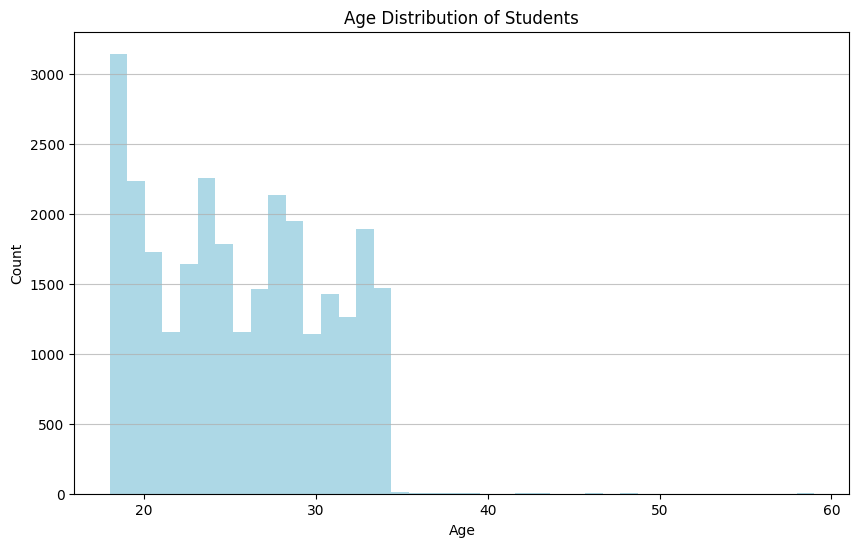

In [8]:
hist_plot(df['Age'], bins=40,
          title='Age Distribution of Students',
          xlabel='Age',
          ylabel='Count')

查看 Academic Pressure 的分布情况

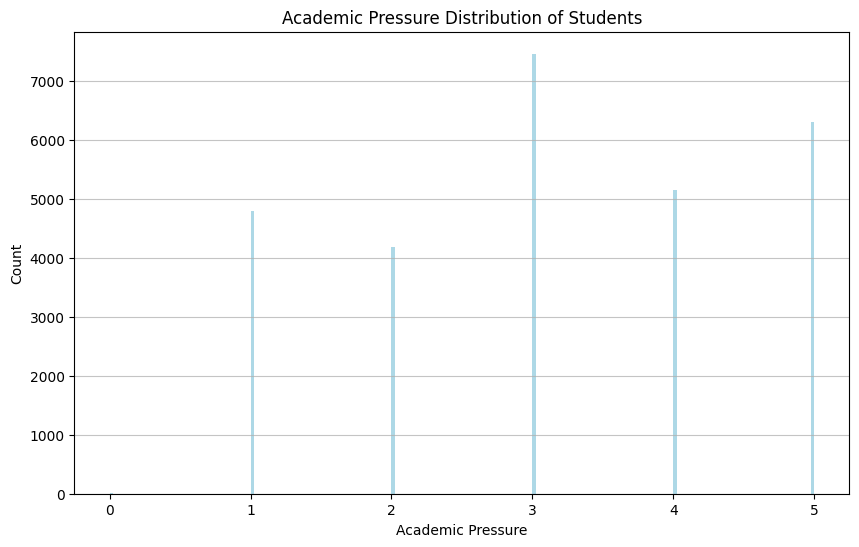

In [9]:
hist_plot(df['Academic Pressure'], bins=200,
          title='Academic Pressure Distribution of Students',
          xlabel='Academic Pressure',
          ylabel='Count')

查看 Work Pressure 的分布情况, 可以看出数据可能有偏, Work Pressure 均为 0.0

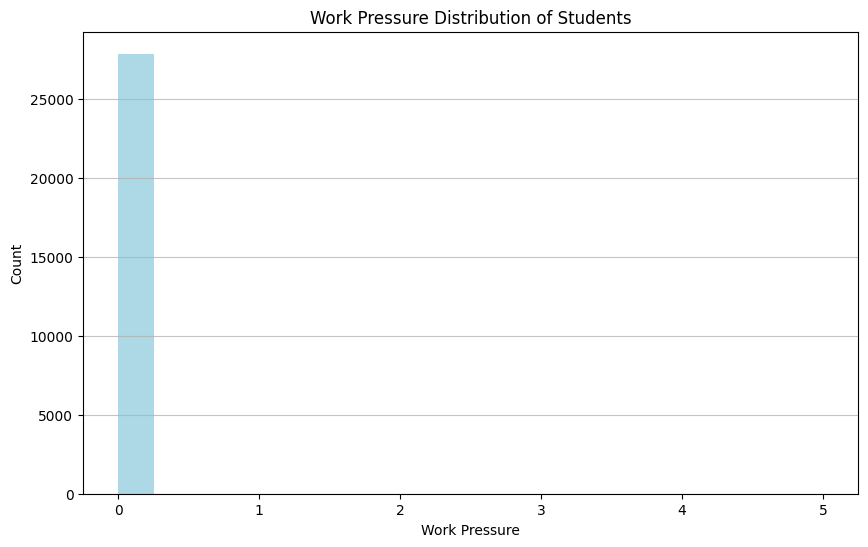

In [10]:
hist_plot(df['Work Pressure'], bins=20,
            title='Work Pressure Distribution of Students',
            xlabel='Work Pressure',
            ylabel='Count')

查看 CGPA 的分布情况

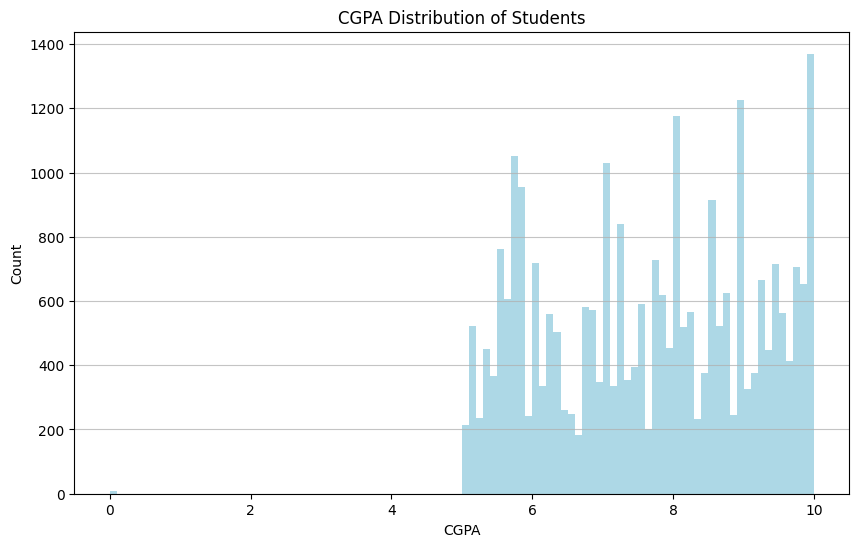

In [11]:
hist_plot(df['CGPA'], bins=100,
          title='CGPA Distribution of Students',
          xlabel='CGPA',
          ylabel='Count')

查看 Study Statisfaction 的分布情况

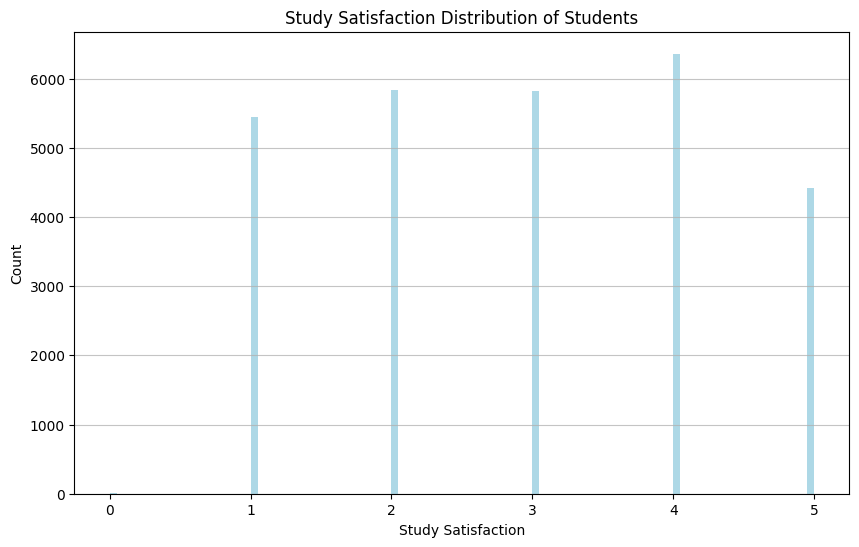

In [12]:
hist_plot(df['Study Satisfaction'], bins=100,
          title='Study Satisfaction Distribution of Students',
          xlabel='Study Satisfaction',
          ylabel='Count')

查看 Job Statisfaction 的分布情况, 可以看出数据可能有偏, Job Satisfaction 均为 0.0

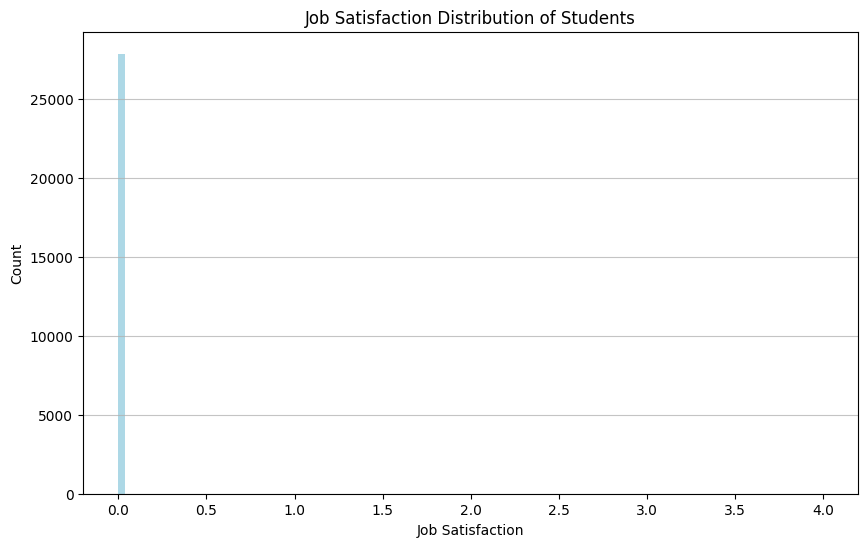

In [13]:
hist_plot(df['Job Satisfaction'], bins=100,
          title='Job Satisfaction Distribution of Students',
          xlabel='Job Satisfaction',
          ylabel='Count')

查看 Work/Study Hours 的分布情况

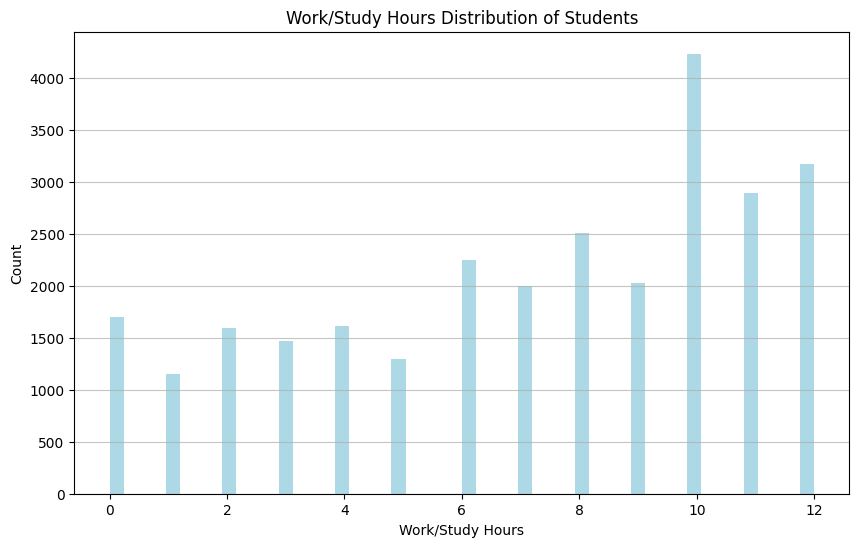

In [14]:
hist_plot(df['Work/Study Hours'], bins=50,
          title='Work/Study Hours Distribution of Students',
          xlabel='Work/Study Hours',
          ylabel='Count')

查看 Financial Stress 的分布情况

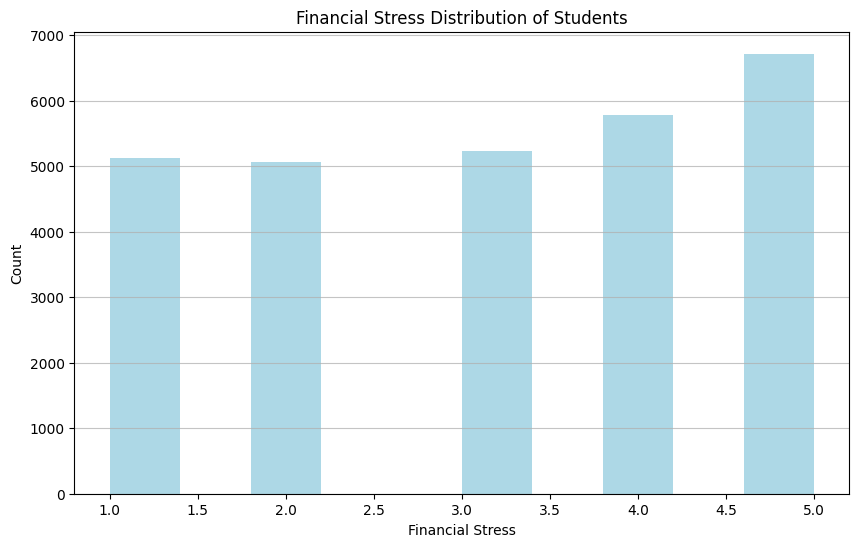

In [15]:
hist_plot(df['Financial Stress'], bins=10,
          title='Financial Stress Distribution of Students',
          xlabel='Financial Stress',
          ylabel='Count')

查看 Sleep Duration 的分布情况

In [16]:
df['Sleep Duration'].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       'Others'], dtype=object)

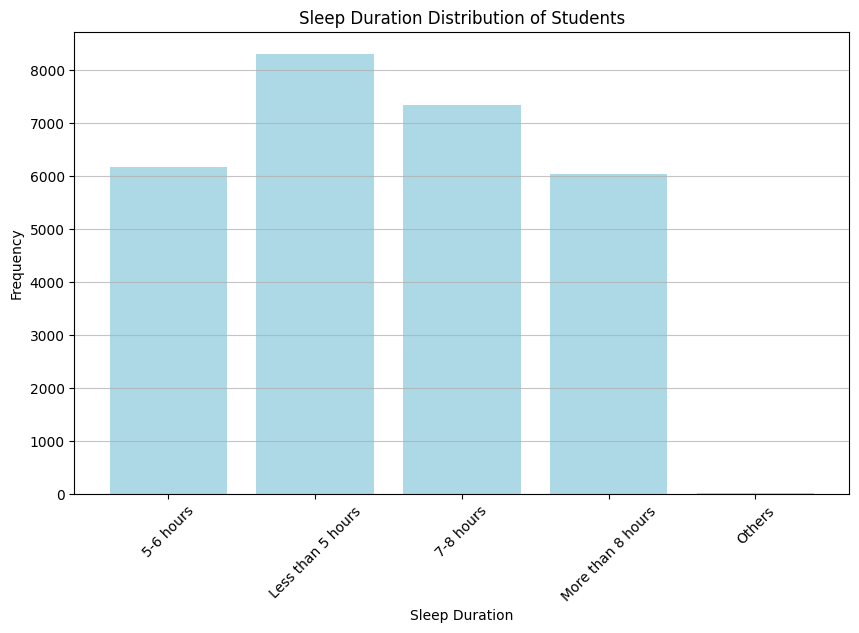

In [17]:
sleep_duration_counts = df['Sleep Duration'].value_counts()
categories = ['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours', 'Others']
sleep_duration_counts = sleep_duration_counts.reindex(categories, fill_value=0)

plt.figure(figsize=(10, 6))
plt.bar(sleep_duration_counts.index, sleep_duration_counts.values, color='lightblue')
plt.title('Sleep Duration Distribution of Students')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

### 2. 聚类分析

### 3. 分类模型与预测分析

### 4. 关联规则挖掘

In [18]:
def classify_academic_pressure(pressure):
    if pressure < 2.0:
        return 'Low'
    elif pressure < 4.0:
        return 'Medium'
    else:
        return 'High'

df['Academic Pressure Class'] = df['Academic Pressure'].apply(classify_academic_pressure)

In [19]:
def classify_study_satisfaction(satisfaction):
    if satisfaction < 2.0:
        return 'Low'
    elif satisfaction < 4.0:
        return 'Medium'
    else:
        return 'High'

df['Study Satisfaction Class'] = df['Study Satisfaction'].apply(classify_study_satisfaction)

In [20]:
def classify_financial_stress(stress):
    if stress < 2.0:
        return 'Low'
    elif stress < 4.0:
        return 'Medium'
    else:
        return 'High'

df['Financial Stress Class'] = df['Financial Stress'].apply(classify_financial_stress)

In [21]:
def classify_work_study_hours(hours):
    if hours < 5.0:
        return 'Low'
    elif hours < 10.0:
        return 'Medium'
    else:
        return 'High'

df['Work/Study Hours Class'] = df['Work/Study Hours'].apply(classify_work_study_hours)

In [22]:
def classify_cgpa(cgpa):
    if cgpa < 5.0:
        return 'Low'
    elif cgpa < 7.0:
        return 'Medium'
    else:
        return 'High'

df['CGPA Class'] = df['CGPA'].apply(classify_cgpa)

In [23]:
def classify_age(age):
    if age < 20:
        return 'Teenager'
    elif age < 30:
        return 'Young Adult'
    else:
        return 'Adult'

df['Age Class'] = df['Age'].apply(classify_age)

In [24]:
df = df.drop(columns=['id', 'Work Pressure', 'Job Satisfaction',
                      'Academic Pressure', 'Study Satisfaction',
                      'Financial Stress', 'Work/Study Hours',
                      'Age', 'CGPA', 'City', 'Profession'])
df_encoded = pd.get_dummies(df)
df_encoded.head()

,Depression,Gender_Female,Gender_Male,Sleep Duration_5-6 hours,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,Dietary Habits_Healthy,Dietary Habits_Moderate,...,Financial Stress Class_Medium,Work/Study Hours Class_High,Work/Study Hours Class_Low,Work/Study Hours Class_Medium,CGPA Class_High,CGPA Class_Low,CGPA Class_Medium,Age Class_Adult,Age Class_Teenager,Age Class_Young Adult
0,1,False,True,True,False,False,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False
1,0,True,False,True,False,False,False,False,False,True,...,True,False,True,False,False,False,True,False,False,True
2,0,False,True,False,False,True,False,False,True,False,...,False,False,False,True,True,False,False,True,False,False
3,1,True,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
4,0,True,False,True,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,True


In [25]:
pprint(list(df_encoded.columns))

['Depression',
 'Gender_Female',
 'Gender_Male',
 'Sleep Duration_5-6 hours',
 'Sleep Duration_7-8 hours',
 'Sleep Duration_Less than 5 hours',
 'Sleep Duration_More than 8 hours',
 'Sleep Duration_Others',
 'Dietary Habits_Healthy',
 'Dietary Habits_Moderate',
 'Dietary Habits_Others',
 'Dietary Habits_Unhealthy',
 'Degree_B.Arch',
 'Degree_B.Com',
 'Degree_B.Ed',
 'Degree_B.Pharm',
 'Degree_B.Tech',
 'Degree_BA',
 'Degree_BBA',
 'Degree_BCA',
 'Degree_BE',
 'Degree_BHM',
 'Degree_BSc',
 'Degree_Class 12',
 'Degree_LLB',
 'Degree_LLM',
 'Degree_M.Com',
 'Degree_M.Ed',
 'Degree_M.Pharm',
 'Degree_M.Tech',
 'Degree_MA',
 'Degree_MBA',
 'Degree_MBBS',
 'Degree_MCA',
 'Degree_MD',
 'Degree_ME',
 'Degree_MHM',
 'Degree_MSc',
 'Degree_Others',
 'Degree_PhD',
 'Have you ever had suicidal thoughts ?_No',
 'Have you ever had suicidal thoughts ?_Yes',
 'Family History of Mental Illness_No',
 'Family History of Mental Illness_Yes',
 'Academic Pressure Class_High',
 'Academic Pressure Class_Low',

In [26]:
frq_items = apriori(df_encoded, min_support=0.1, use_colnames=True)
rules = association_rules(frq_items, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

/home/zhuhongming/miniconda3/envs/dm/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [27]:
frq_items

,support,itemsets
0,0.585526,(Depression)
1,0.442756,(Gender_Female)
2,0.557244,(Gender_Male)
3,0.221557,(Sleep Duration_5-6 hours)
4,0.263316,(Sleep Duration_7-8 hours)
...,...,...
864,0.11223,"(CGPA Class_High, Family History of Mental Ill..."
865,0.10352,"(Financial Stress Class_High, CGPA Class_High,..."
866,0.106961,"(Financial Stress Class_High, Age Class_Young ..."
867,0.122769,"(CGPA Class_High, Age Class_Young Adult, Have ..."


In [28]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
167,(Age Class_Teenager),(Degree_Class 12),0.112804,0.217937,0.112051,0.993327,4.557868,0.087467,117.197761,0.879850
3770,"(Financial Stress Class_High, Have you ever ha...",(Depression),0.110187,0.585526,0.106961,0.970722,1.657864,0.042444,14.156595,0.445952
3742,"(Financial Stress Class_High, Have you ever ha...",(Depression),0.107176,0.585526,0.103520,0.965886,1.649605,0.040766,12.149782,0.441066
2561,"(Financial Stress Class_High, Have you ever ha...",(Depression),0.165137,0.585526,0.159044,0.963100,1.644846,0.062352,11.232250,0.469586
2575,"(Academic Pressure Class_High, Have you ever h...",(Depression),0.129185,0.585526,0.122805,0.950610,1.623516,0.047163,8.391937,0.441027
2285,"(Dietary Habits_Unhealthy, Have you ever had s...",(Depression),0.135314,0.585526,0.128504,0.949669,1.621908,0.049274,8.234947,0.443447
3800,"(Age Class_Young Adult, Have you ever had suic...",(Depression),0.130726,0.585526,0.122769,0.939128,1.603905,0.046225,6.808952,0.433145
3540,"(Age Class_Young Adult, Have you ever had suic...",(Depression),0.108646,0.585526,0.101584,0.935005,1.596864,0.037969,6.377011,0.419331
2615,"(Age Class_Young Adult, Have you ever had suic...",(Depression),0.201986,0.585526,0.188544,0.933452,1.594211,0.070276,6.228165,0.467072
2298,"(Dietary Habits_Unhealthy, Financial Stress Cl...",(Depression),0.141946,0.585526,0.132447,0.933081,1.593577,0.049334,6.193652,0.434100


In [29]:
pprint(list(rules['antecedents'].head(10).values))

[frozenset({'Age Class_Teenager'}),
 frozenset({'Academic Pressure Class_High',
            'Age Class_Young Adult',
            'Financial Stress Class_High',
            'Have you ever had suicidal thoughts ?_Yes'}),
 frozenset({'Academic Pressure Class_High',
            'CGPA Class_High',
            'Financial Stress Class_High',
            'Have you ever had suicidal thoughts ?_Yes'}),
 frozenset({'Academic Pressure Class_High',
            'Financial Stress Class_High',
            'Have you ever had suicidal thoughts ?_Yes'}),
 frozenset({'Academic Pressure Class_High',
            'Have you ever had suicidal thoughts ?_Yes',
            'Work/Study Hours Class_High'}),
 frozenset({'Academic Pressure Class_High',
            'Dietary Habits_Unhealthy',
            'Have you ever had suicidal thoughts ?_Yes'}),
 frozenset({'Academic Pressure Class_High',
            'Age Class_Young Adult',
            'CGPA Class_High',
            'Have you ever had suicidal thoughts ?_Yes'})